<h1 style="text-align: center"> Desafio Final - Trilha Engenheiro IA Microsoft 2021 </h1>

![logo_MS](https://i.imgur.com/jxPRyD4.jpeg)

In [1]:
# bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('microdados_enem_2019.csv', sep= ';')

In [3]:
pd.options.display.max_columns = 9999

In [57]:
data.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
26,190001867757,2019,4101408,Apucarana,41,PR,17.0,F,1,1,1,4101408.0,Apucarana,41.0,PR,2,0,3,1.0,0,41026039.0,4101408.0,Apucarana,41.0,PR,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4101408,Apucarana,41,PR,1,1,1,1,504.0,509.0,514.0,516.0,618.2,744.7,636.3,713.7,BACACEDDEBCDEADAAEABBAADBDBBBCCACCBCBCBEDCDDA,ACACEEBCCBABADABEACDBBEBCCCADCEBACCBEEDBBEACB,EBBAD99999BAEBADBDEBDAADCAECAECDDBADBCDAADCBCC...,BEBEAEAADAABABAABDDBAECDDDABCCADECADCCABDCBAC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,200.0,200.0,180.0,160.0,900.0,E,E,B,B,2,E,A,B,C,B,A,B,B,B,A,B,A,B,B,B,A,C,B,B,B
28,190001692704,2019,4300604,Alvorada,43,RS,18.0,F,1,1,1,4300604.0,Alvorada,43.0,RS,2,0,2,1.0,0,43013945.0,4300604.0,Alvorada,43.0,RS,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4300604,Alvorada,43,RS,1,1,1,1,506.0,507.0,511.0,517.0,430.4,466.8,515.9,394.1,BCDCAEDBABECDDCBEEAECADACEDBAEDACBCDABAEDC*DD,EEAEDEBCEBDDBCAAABCCCDDEBDBBAACBEDCBABAAEDCCE,99999CDDBDCABBBDACCEDACECBEECAECCDCAAEDCCDADDC...,DBABCCBCDBAEEDDCBBACEDEDCBDAABDECDBACAEBAECEB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,120.0,120.0,40.0,580.0,E,B,B,B,3,A,A,B,D,A,A,B,B,B,A,A,A,A,B,B,A,D,A,B,A
31,190001595660,2019,3523107,Itaquaquecetuba,35,SP,17.0,F,1,2,1,3550308.0,S�o Paulo,35.0,SP,2,0,2,1.0,0,35006713.0,3530607.0,Mogi das Cruzes,35.0,SP,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3523107,Itaquaquecetuba,35,SP,1,1,1,1,505.0,509.0,514.0,518.0,371.8,501.4,518.6,442.0,ABACBDDDBBEECEACBDCBBDBCBACCAAEADBBCDABBDCBDE,AEABAECCDAAEADAADBBCBEBCCDABCECABDEBCEBBBABAB,99999.....DBCDCDEAEBAAADDDEBAECBDEEABECCCECEBC...,ACACAEBBBBDABDCCDBCAACEBBDCEBBEACDBBAEDDBEBDB,1,DADCCE

In [5]:
data.dropna(inplace=True)

In [6]:
print("A base de dados apresenta {} registros e {} variáveis.".format(data.shape[0], data.shape[1]))

A base de dados apresenta 881707 registros e 136 variáveis.


# Desafio 1

#### Verificar se é possível prever a nota de ciências da natureza de um aluno com base na nota de matemática

In [7]:
notas_provas = data[["CO_PROVA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC"]]

In [8]:
notas_provas = notas_provas.rename(columns={'CO_PROVA_MT': 'Matematica', 
                                           'NU_NOTA_CN': 'Ciencias_da_natureza', 
                                           'NU_NOTA_CH': 'Ciencias_humanas',
                                          'NU_NOTA_LC': 'Linguas_e _codigos'})

In [9]:
notas_provas.head(n=10)

,Matematica,Ciencias_da_natureza,Ciencias_humanas,Linguas_e _codigos
26,516.0,618.2,744.7,636.3
28,517.0,430.4,466.8,515.9
31,518.0,371.8,501.4,518.6
34,517.0,567.3,584.1,595.8
55,516.0,385.8,436.3,393.8
56,517.0,389.7,431.1,482.0
83,518.0,427.6,548.8,587.2
96,517.0,510.9,585.4,578.4
100,516.0,361.2,499.0,403.5
105,516.0,556.8,487.0,571.8


In [10]:
relacao_notas = notas_provas.corr()

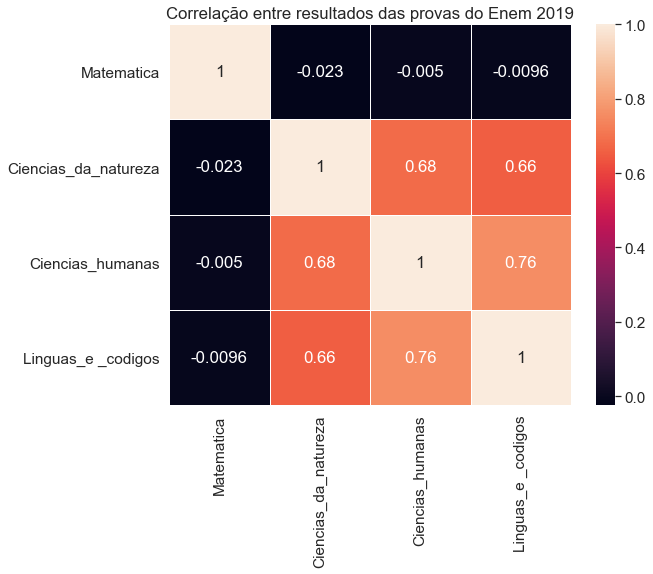

In [35]:
sns.set(font_scale=1.4)
f, ax = plt.subplots(figsize=(9, 7))
ax = sns.heatmap(relacao_notas, linewidths=.5, annot=True)
ax.set_title('Correlação entre resultados das provas do Enem 2019')
plt.show()

# Análise de correlação


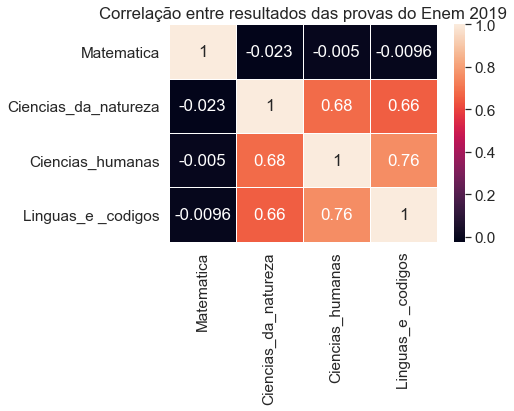


É possível afirmar com base na análise, que existe uma correlação forte e positiva entre os resultados de ciências humanas e Línguas e códigos, e uma correlação moderada entre os resultados das provas de ciencias humanas com ciencias da natureza e entre linguas e códigos e ciências da natureza </p>

<p>Baseado apenas em conhecimento empírico, podemos afirmar que essa correlação vem da aptidão ou gosto dos alunos em focar os estudos em matérias do campo de conhecimento na área de humanas, o que pode ser confirmado beaseado no gráfico que matemática e suas tecnologias apresenta uma correlação irrelevante em comparação com os outros conjuntos de dados.

In [12]:
X = notas_provas['Matematica']
y = notas_provas['Ciencias_da_natureza']

In [13]:
print("Estatísticas descritivas de X:")
X.describe()

Estatísticas descritivas de X:


count    881707.000000
mean        516.509212
std           1.151792
min         515.000000
25%         516.000000
50%         517.000000
75%         518.000000
max         558.000000
Name: Matematica, dtype: float64

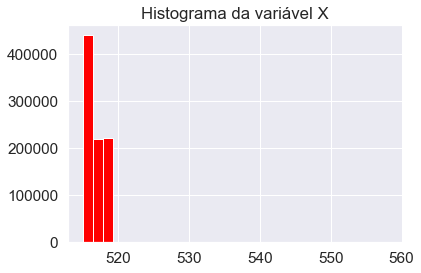

In [14]:
plt.hist(X, color='red', bins=30)
plt.title('Histograma da variável X')
plt.show()

In [15]:
print("Estatísticas descritivas de y:")
y.describe()

Estatísticas descritivas de y:


count    881707.000000
mean        476.125764
std          75.759270
min           0.000000
25%         415.600000
50%         468.500000
75%         532.500000
max         853.500000
Name: Ciencias_da_natureza, dtype: float64

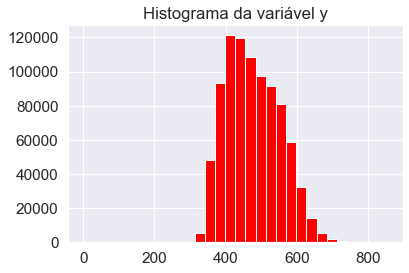

In [16]:
plt.hist(y, color='red', bins=30,)
plt.title('Histograma da variável y')
plt.show()

In [17]:
lm_model = LinearRegression()
lm_model.fit(X.values.reshape(-1,1), y)

LinearRegression()

In [18]:
slope = lm_model.coef_
intercept = lm_model.intercept_

In [19]:
# imprimir os valores encontrados para os parâmetros
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))

b0: 	1260.2919287359387
b1: 	-1.518203637094375


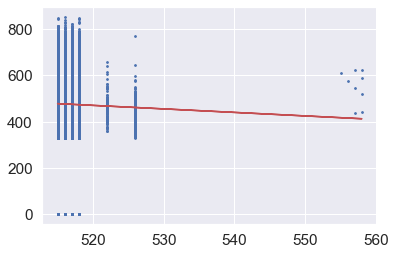

In [20]:
plt.scatter(X, y, s=3)
plt.plot(X, (X * slope + intercept), color='r')
 
plt.show()

# Resultado

Não foi possível chegar a um resultado satisfatório da regressão pois as variáveis utilizadas para o desafio possuem um nível de correlação insignificante.

# Desafio 2 

#### Apresentar o resultado do cluster de estudantes com base na sua classe social, acesso a internet e sua nota na redação.

In [43]:
dados_renda_redacao = data[["Q006", "Q025", "NU_NOTA_REDACAO"]]

In [44]:
dados_renda_redacao = dados_renda_redacao.rename(columns={
    'Q006': 'renda_mensal',
    'Q025': 'acesso_a_internet',
    'NU_NOTA_REDACAO': 'nota_redacao'
})

In [45]:
dados_renda_redacao.sort_values(by='renda_mensal', ascending=True, inplace=True)

In [46]:
dados_renda_redacao.head()

,renda_mensal,acesso_a_internet,nota_redacao
2014839,A,B,520.0
1471983,A,B,520.0
4770939,A,A,400.0
2308389,A,A,0.0
3642061,A,B,660.0


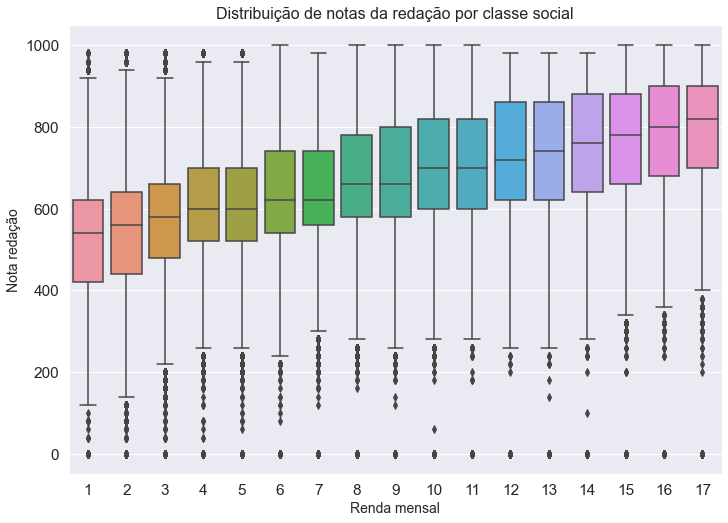

In [150]:
a4_dim = (11.7, 8.27)
plt.figure(figsize=a4_dim)
boxplot = sns.boxplot(x="renda_mensal", y="nota_redacao", data=dados_renda_redacao)
boxplot.axes.set_title("Distribuição de notas da redação por classe social", fontsize=16)
boxplot.set_xlabel("Renda mensal", fontsize=14)
boxplot.set_ylabel("Nota redação", fontsize=14)
plt.show()

## Resultado

É possível perceber nítidamente que quanto maior a classe social do estudante maior a nota da redação, sendo o acesso a internet um fator não determinante, visto que as notas altas de alunos da classe A com ou sem acesso a internet são tratadas como outliers na análise, diferentemente das classes mais altas onde as notas abaixo de 400 são tratadas como outliers.

# Desafio 3

In [174]:
dados_renda_nota_geral = data[["Q006", "TP_COR_RACA", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT","NU_NOTA_REDACAO"]]

In [175]:
mean_column = ((dados_renda_nota_geral["NU_NOTA_CN"] + 
               dados_renda_nota_geral["NU_NOTA_CH"] + 
               dados_renda_nota_geral["NU_NOTA_LC"] + 
               dados_renda_nota_geral["NU_NOTA_MT"] + 
               dados_renda_nota_geral["NU_NOTA_REDACAO"])/5)
mean_column

26         722.58
28         477.44
31         498.76
34         614.34
55         369.18
            ...  
5095172    510.92
5095176    559.78
5095204    609.52
5095239    391.10
5095245    473.16
Length: 881707, dtype: float64

In [176]:
dados_renda_nota_geral = dados_renda_nota_geral.rename(columns={
    'Q006': 'renda_mensal',
    'TP_COR_RACA': 'cor_raca',
    'NU_NOTA_MT': 'nota_matematica',
    'NU_NOTA_CN': 'nota_ciencias_da_natureza',
    'NU_NOTA_CH': 'nota_ciencias_humanas',
    'NU_NOTA_LC': 'nota_linguas_e _codigos',
    'NU_NOTA_REDACAO': 'nota_redacao'                                                                         
})

In [177]:
dados_renda_nota_geral.reset_index()
dados_renda_nota_geral.head()

,renda_mensal,cor_raca,nota_ciencias_da_natureza,nota_ciencias_humanas,nota_linguas_e _codigos,nota_matematica,nota_redacao
26,E,1,618.2,744.7,636.3,713.7,900.0
28,A,1,430.4,466.8,515.9,394.1,580.0
31,B,2,371.8,501.4,518.6,442.0,660.0
34,B,2,567.3,584.1,595.8,704.5,620.0
55,B,3,385.8,436.3,393.8,370.0,260.0


In [178]:
dados_renda_nota_geral.insert(loc=7, column='nota_geral', value=mean_column)

In [179]:
dados_renda_nota_geral.head()

,renda_mensal,cor_raca,nota_ciencias_da_natureza,nota_ciencias_humanas,nota_linguas_e _codigos,nota_matematica,nota_redacao,nota_geral
26,E,1,618.2,744.7,636.3,713.7,900.0,722.58
28,A,1,430.4,466.8,515.9,394.1,580.0,477.44
31,B,2,371.8,501.4,518.6,442.0,660.0,498.76
34,B,2,567.3,584.1,595.8,704.5,620.0,614.34
55,B,3,385.8,436.3,393.8,370.0,260.0,369.18


In [180]:
dados_renda_nota_geral.sort_values(by='renda_mensal', ascending=True, inplace=True)

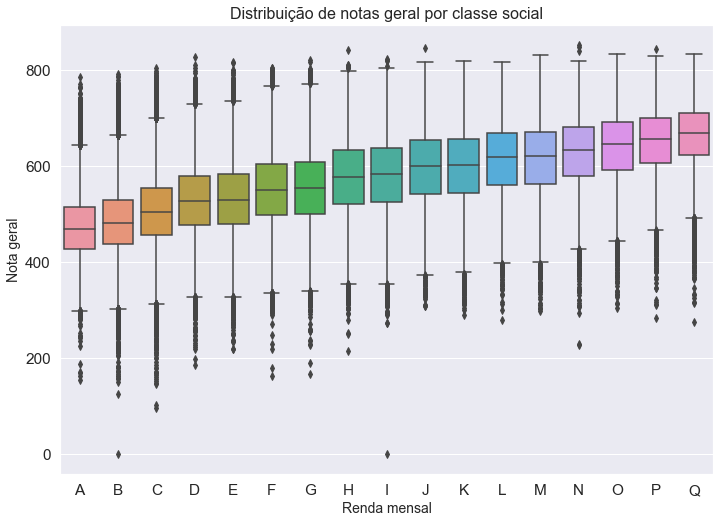

In [181]:
a4_dim = (11.7, 8.27)
plt.figure(figsize=a4_dim)
boxplot = sns.boxplot(x="renda_mensal", y="nota_geral", data=dados_renda_nota_geral)
boxplot.axes.set_title("Distribuição de notas geral por classe social", fontsize=16)
boxplot.set_xlabel("Renda mensal", fontsize=14)
boxplot.set_ylabel("Nota geral", fontsize=14)
plt.show()

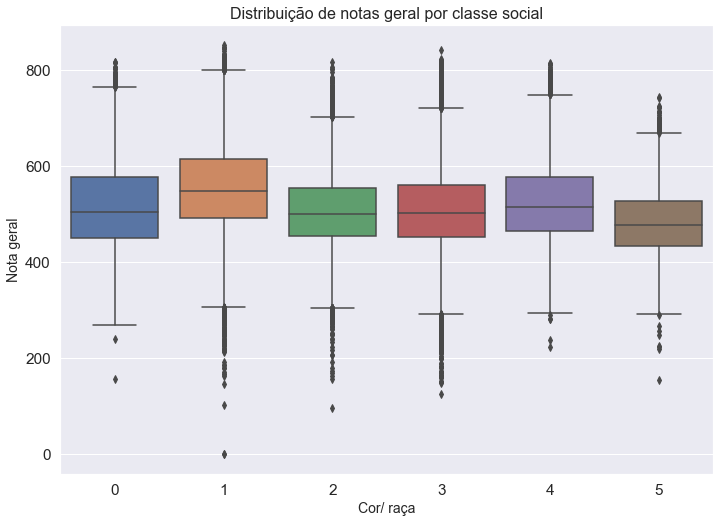

In [186]:
a4_dim = (11.7, 8.27)
plt.figure(figsize=a4_dim)
boxplot = sns.boxplot(x="cor_raca", y="nota_geral", data=dados_renda_nota_geral)
boxplot.axes.set_title("Distribuição de notas geral por classe social", fontsize=16)
boxplot.set_xlabel("Cor/ raça", fontsize=14)
boxplot.set_ylabel("Nota geral", fontsize=14)
plt.show()

Cor/ raça | Descrição
------------ | -------------
0 | Não declarada
1 | Branca
2 | Preta
3 | Parda
4 | Amarela
5 | Indígena


# Análise

Com um resultado bem próximo ao desafio 3, neste caso podemos perceber que a cor do estudante também é um fator que influencia  as notas em geral, onde podemos concluir que pessoas brancas de alta classe social tendem a atingir melhores notas no ENEM 2019 e em contrapartida pessoas de baixa ou nenhuma renda e/ou se consideram indigenas tendem a não atingir bons resultados gerais. 